In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('/content/Credit Card Customer Data.csv')
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['Sl_No','Customer Key','Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']] = scaler_mm.fit_transform(dataset[['Sl_No','Customer Key','Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']])
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.000000,0.855833,0.492386,0.111111,0.2,0.066667,0.0
1,0.001517,0.306498,0.238579,0.222222,0.0,0.666667,0.9
2,0.003035,0.068595,0.238579,0.666667,0.2,0.200000,0.4
3,0.004552,0.330003,0.137056,0.444444,0.2,0.066667,0.4
4,0.006070,0.408363,0.492386,0.555556,0.0,0.800000,0.3


In [7]:
cols_for_clusters = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
# Извлекаем только нужные числовые признаки
X = dataset[cols_for_clusters].copy()

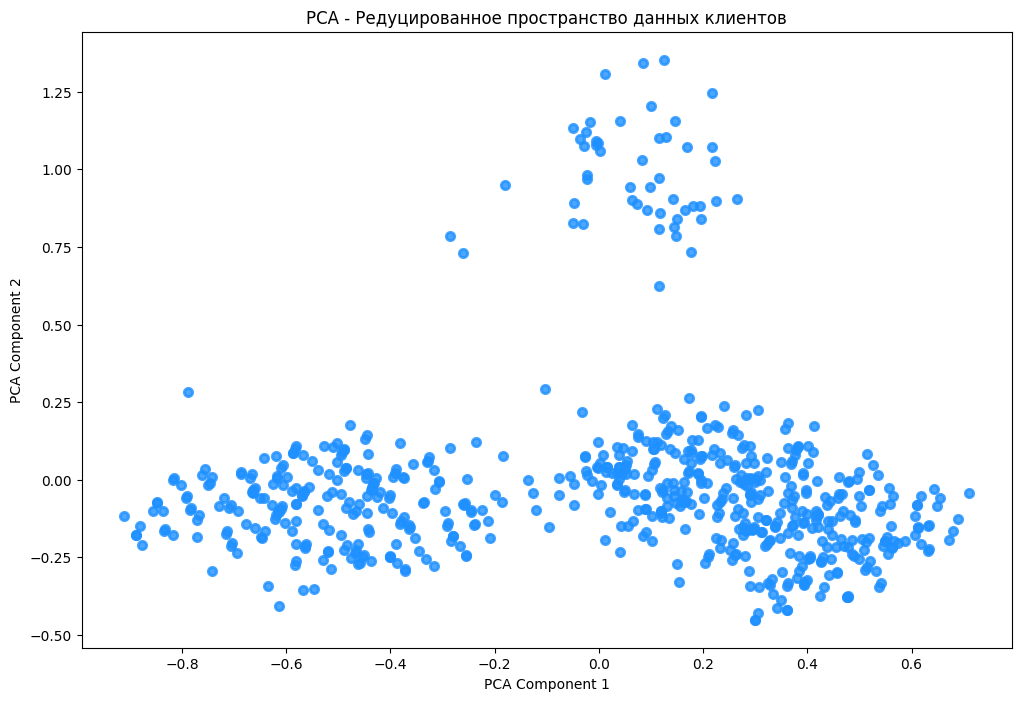

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
# Применение PCA для понижения размерности
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

# Визуализация данных в 2D
plt.figure(figsize=(12, 8))

# Поскольку у нас нет категориальных меток, мы будем использовать только цвет для различия клиентов
plt.scatter(X_new[:, 0], X_new[:, 1], color="dodgerblue", alpha=0.8, lw=2)

plt.title('PCA - Редуцированное пространство данных клиентов')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [10]:
pca.explained_variance_ratio_

array([0.53403218, 0.30786704])

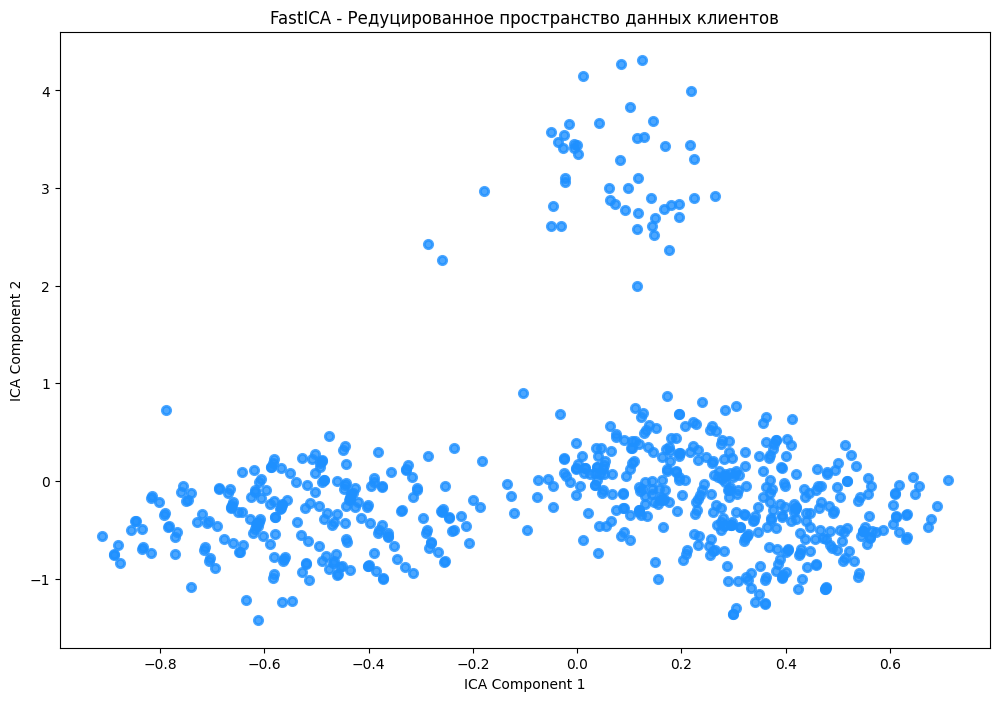

In [13]:
from sklearn.decomposition import FastICA
# Применяем FastICA для понижения размерности
fast_ica = FastICA(n_components=2, random_state=42)
X_New = fast_ica.fit_transform(X)

# Визуализируем результат
plt.figure(figsize=(12, 8))

# Поскольку у нас нет категориальных меток, мы просто покажем все данные с одинаковым цветом
plt.scatter(X_new[:, 0], X_New[:, 1], color="dodgerblue", alpha=0.8, lw=2)

plt.title('FastICA - Редуцированное пространство данных клиентов')
plt.xlabel("ICA Component 1")
plt.ylabel("ICA Component 2")
plt.show()

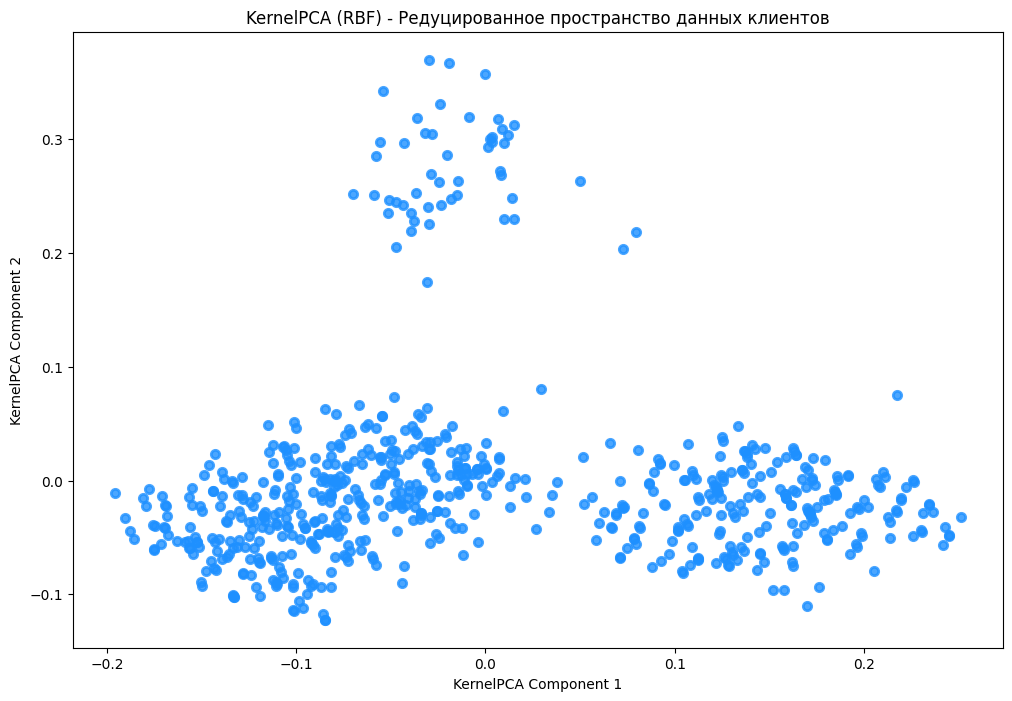

In [15]:
from sklearn.decomposition import KernelPCA
# Применяем KernelPCA с ядром RBF
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

# Визуализируем результат KernelPCA
plt.figure(figsize=(12, 8))

# Просто отображаем все точки с одинаковым цветом, поскольку у нас нет категориальных меток
plt.scatter(X_new[:, 0], X_new[:, 1], color="dodgerblue", alpha=0.8, lw=2)

plt.title('KernelPCA (RBF) - Редуцированное пространство данных клиентов')
plt.xlabel("KernelPCA Component 1")
plt.ylabel("KernelPCA Component 2")
plt.show()

In [17]:
from sklearn.manifold import TSNE
# Применяем t-SNE
tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

Initial Shape of X:  (660, 5)
New Shape of X:  (660, 2)
Kullback-Leibler divergence after optimization:  0.49045127630233765
No. of iterations:  999


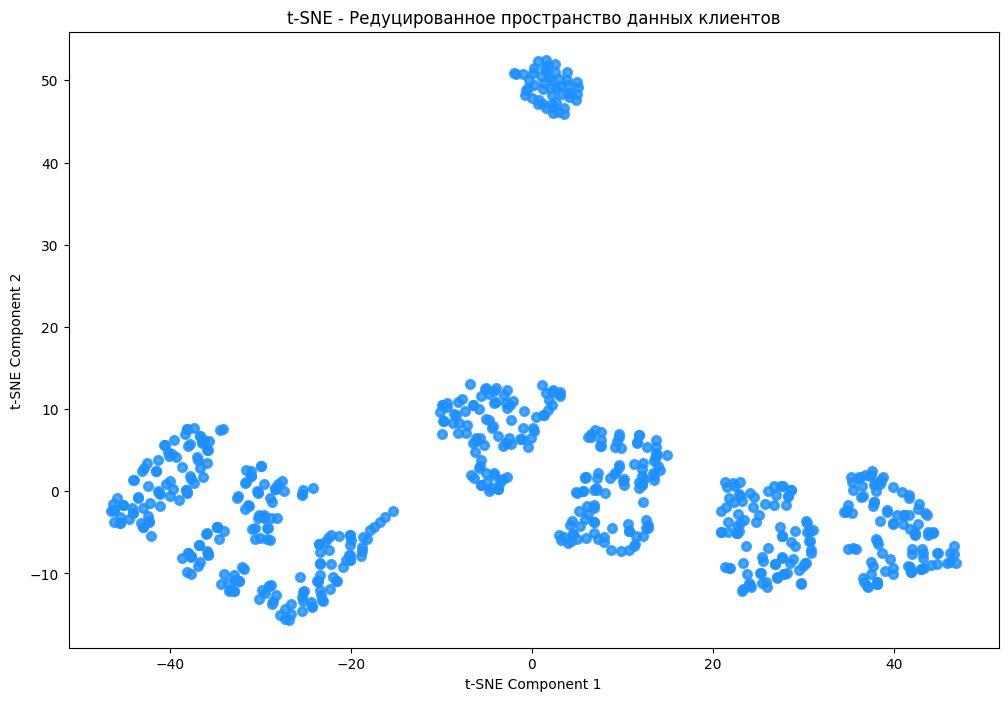

In [18]:
# Визуализация результата
plt.figure(figsize=(12, 8))

# Просто отображаем все точки с одинаковым цветом, поскольку у нас нет категориальных меток
plt.scatter(X_new[:, 0], X_new[:, 1], color="dodgerblue", alpha=0.8, lw=2)

plt.title('t-SNE - Редуцированное пространство данных клиентов')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [71]:
# Применяем DBSCAN для кластеризации
dbscan_cluster1 = DBSCAN(eps=0.3, min_samples=6)
labels = dbscan_cluster1.fit_predict(X)

In [72]:


# Определяем количество кластеров (без учета шума)
N_clus = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Estimated no. of clusters: {N_clus}')

# Определяем количество точек, помеченных как шум (-1)
n_noise = list(labels).count(-1)
print(f'Estimated no. of noise points: {n_noise}')

Estimated no. of clusters: 2
Estimated no. of noise points: 2


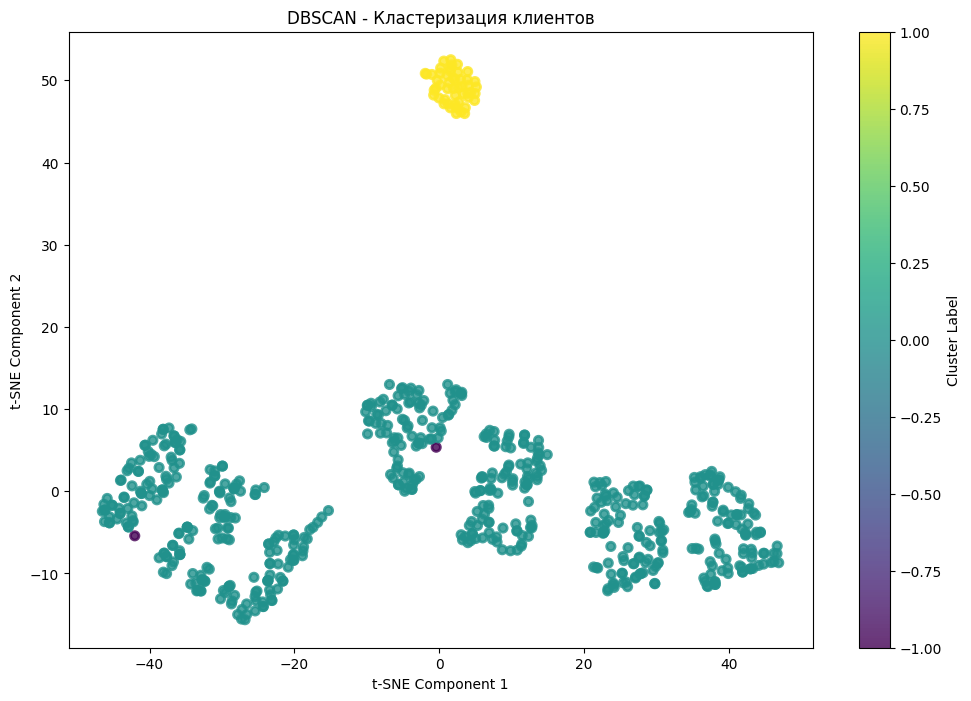

In [73]:
plt.figure(figsize=(12, 8))
lw = 2

# Визуализируем результаты кластеризации
plt.scatter(X_new[:, 0], X_new[:, 1], c=labels, cmap='viridis', alpha=0.8, lw=lw)

# Подписи и легенда
plt.title('DBSCAN - Кластеризация клиентов')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

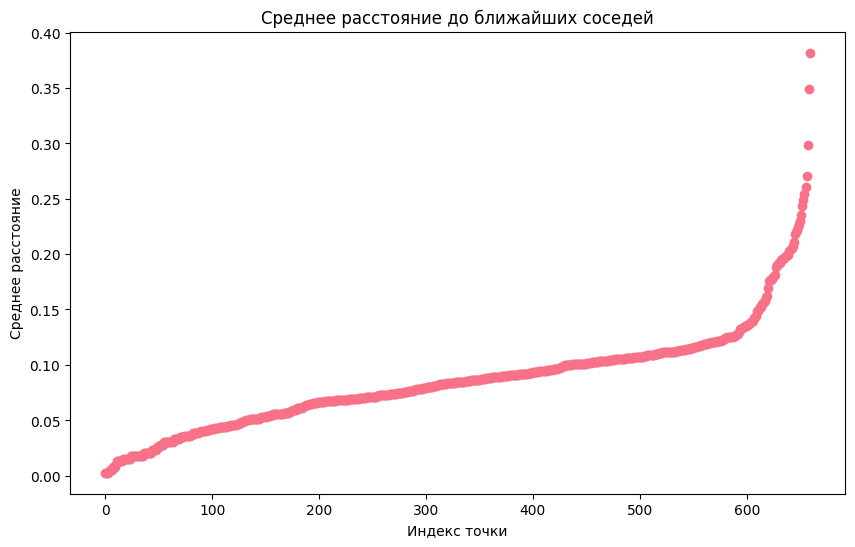

In [79]:
from sklearn.neighbors import NearestNeighbors
# Параметр min_samples
min_samples = 3

# Найдем ближайших соседей
knn = NearestNeighbors(n_neighbors=min_samples, metric='l2')  # Используем Евклидово расстояние
knn.fit(X)

# Получаем расстояния и индексы ближайших соседей
dists, inds = knn.kneighbors(X)

# Среднее расстояние до ближайших соседей
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

# Визуализация графика
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dists_ar)), dists_ar)
plt.title('Среднее расстояние до ближайших соседей')
plt.xlabel('Индекс точки')
plt.ylabel('Среднее расстояние')
plt.show()


In [78]:
# Вывод всех доступных метрик расстояния
from sklearn.metrics.pairwise import distance_metrics
print(distance_metrics())

{'cityblock': <function manhattan_distances at 0x792b11b48af0>, 'cosine': <function cosine_distances at 0x792b11b48c10>, 'euclidean': <function euclidean_distances at 0x792b11b48310>, 'haversine': <function haversine_distances at 0x792b11b489d0>, 'l2': <function euclidean_distances at 0x792b11b48310>, 'l1': <function manhattan_distances at 0x792b11b48af0>, 'manhattan': <function manhattan_distances at 0x792b11b48af0>, 'precomputed': None, 'nan_euclidean': <function nan_euclidean_distances at 0x792b11b484c0>}


In [81]:
# Параметры DBSCAN
min_samples = 3
eps = 0.2

# Применяем DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
pred = dbscan.fit_predict(X)

# Получаем метки (кластеры) и количество кластеров
labels = dbscan.labels_
N_clus = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % N_clus)

# Количество аномальных точек (класс -1)
n_noise = list(labels).count(-1)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 6
Estimated number of noise points: 22


In [82]:
# Находим индексы аномальных точек (класс -1)
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.iloc[anom_index]


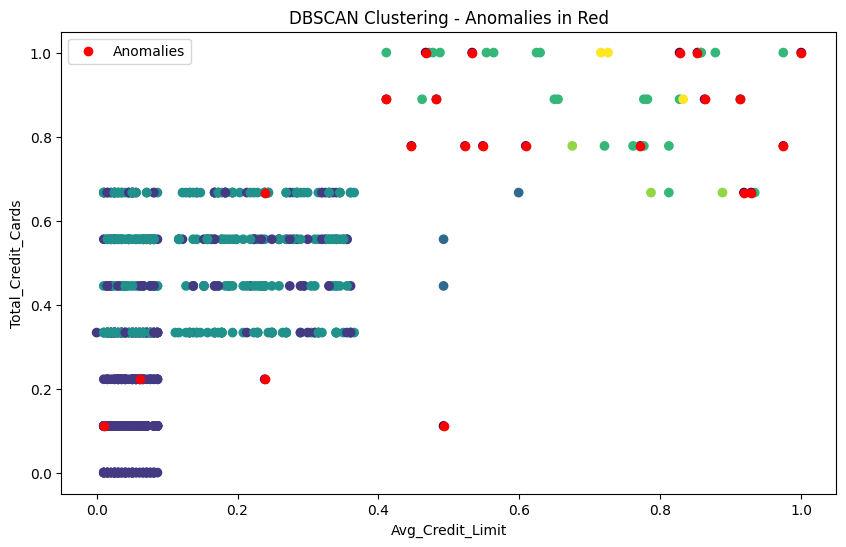

In [83]:
# Строим график
plt.figure(figsize=(10, 6))

# Рисуем все точки с цветами по кластерам
plt.scatter(X['Avg_Credit_Limit'], X['Total_Credit_Cards'], c=dbscan.labels_, cmap='viridis', marker='o')

# Рисуем аномалии красным
plt.scatter(values['Avg_Credit_Limit'], values['Total_Credit_Cards'], color='r', label='Anomalies')

plt.title("DBSCAN Clustering - Anomalies in Red")
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.legend()
plt.show()